## 문제. 아래 함수의 최대값과 최소값을 구하여라.  

$$
f(x) = 2x^3 - 9x^2 + 12x - 2 \quad (1 \leq x \leq 3)
$$

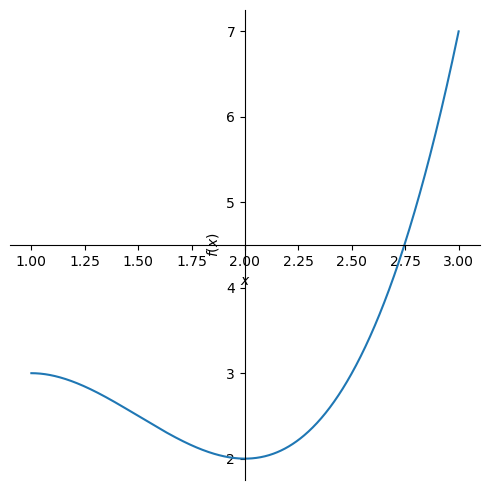

In [1]:
from sympy import plot,symbols

x=symbols('x',real=True)
f=2*x**3-9*x**2+12*x-2
plot(f,(x,1,3),size=(5,5))

In [2]:
# 도함수 구하기
from sympy import diff,pprint,solve
fprime=diff(f,x)
fprime

6*x**2 - 18*x + 12

In [3]:
# 2차 도함수
f2prime=diff(f,x,2)
f2prime

6*(2*x - 3)

In [4]:
# 극값 구하기
cps=solve(fprime,x) # fprime=0일때의 해를 cps에 저장

# cps에 있는 값들을 f에 대입하여 값을 저장
[f.subs(x,point) for point in cps] 

[3, 2]

In [5]:
# 최대값과 최소값 구하기
import numpy as np
fvalues=[f.subs(x,1),f.subs(x,3),3,2]
print(f'최대값: {np.max(fvalues)}')
print(f'최소값: {np.min(fvalues)}')

최대값: 7
최소값: 2


In [6]:
# 일반 함수 변환
from sympy import lambdify
f0=lambdify((x),f,'numpy')
f0(1)

3

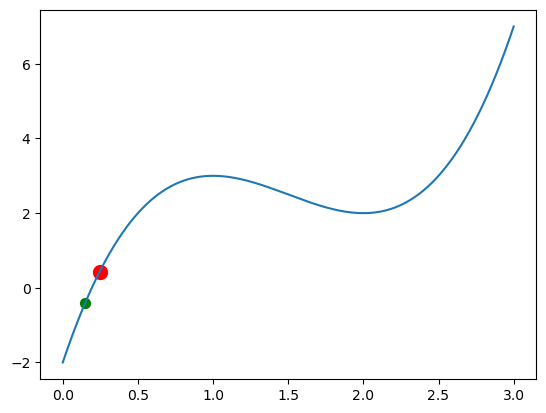

In [8]:
# 기울기 방향으로 이동
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plt

x=symbols('x')
yprime=6*x**2-18*x+12
y=2*x**3-9*x**2+12*x-2

xps=np.linspace(0,3,1000)
yps=2*xps**3-9*xps**2+12*xps-2

alpha=0.01 # 기울기 가중치
Starting_Point=(xps[50],yps[50])
x0=Starting_Point[0]
x_new=x0+alpha*yprime.subs(x,x0)
y_new=y.subs(x,x_new)
Final_Point=(x_new,y_new)

plt.plot(xps,yps)
plt.scatter(*Starting_Point,color='g',s=50,label='Start')
plt.scatter(*Final_Point,color='r',s=100,label='Final')

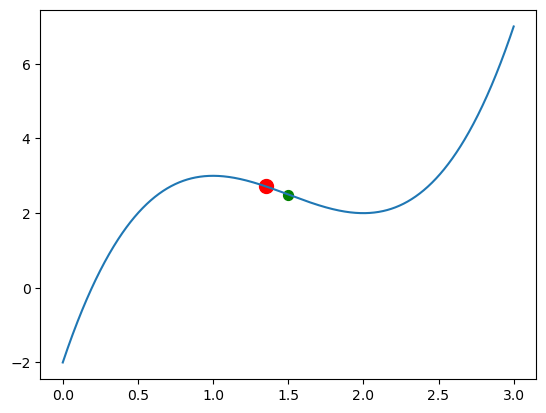

In [9]:
# 기울기의 방향으로 이동
alpha=0.1 # 기울기 가중치
Starting_Point=(xps[500],yps[500])
x0=Starting_Point[0]
x_new=x0+alpha*yprime.subs(x,x0)
y_new=y.subs(x,x_new)
Final_Point=(x_new,y_new)

plt.plot(xps,yps)
plt.scatter(*Starting_Point,color='g',s=50,label='Start')
plt.scatter(*Final_Point,color='r',s=100,label='Final')

10000 반복 후 최종 기울기: 5.32907051820075E-15
0.999999999999999일 때 극대값 3.00000000000000을 가진다


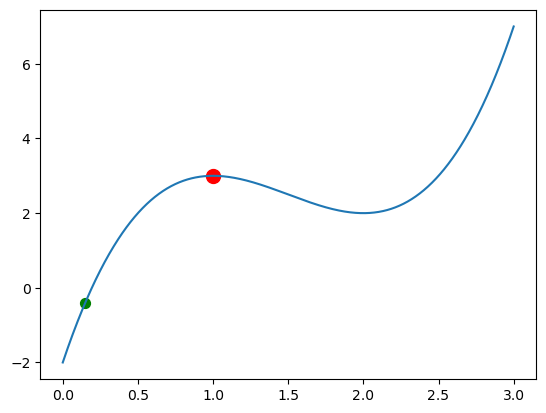

In [10]:
# 극대값으로 이동시키기
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plt

x=symbols('x')
yprime=6*x**2-18*x+12
y=2*x**3-9*x**2+12*x-2

xps=np.linspace(0,3,1000)
yps=2*xps**3-9*xps**2+12*xps-2

alpha=0.01 # 기울기 가중치
Starting_Point=(xps[50],yps[50])
x0=Starting_Point[0]

N=10000 # 반복회수
for _ in range(N):
  dx=yprime.subs(x,x0)
  x0=x0+alpha*dx # 좌표 업데이트

y_new=y.subs(x,x0)
Final_Point=(x0,y_new)

print(f'{N} 반복 후 최종 기울기: {dx}')
print(f'{x0}일 때 극대값 {y_new}을 가진다')

plt.plot(xps,yps)
plt.scatter(*Starting_Point,color='g',s=50,label='Start')
plt.scatter(*Final_Point,color='r',s=100,label='Final')

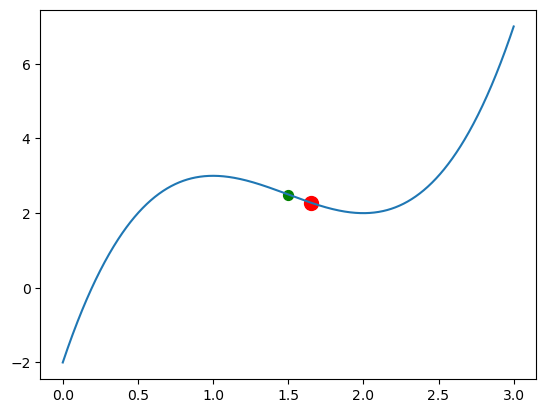

In [11]:
# 기울기의 반대 방향으로 이동
xps=np.linspace(0,3,1000)
yps=2*xps**3-9*xps**2+12*xps-2

alpha=0.1 # 기울기 가중치
Starting_Point=(xps[500],yps[500])
x0=Starting_Point[0]
x_new=x0-alpha*yprime.subs(x,x0)
y_new=y.subs(x,x_new)
Final_Point=(x_new,y_new)

plt.plot(xps,yps)
plt.scatter(*Starting_Point,color='g',s=50,label='Start')
plt.scatter(*Final_Point,color='r',s=100,label='Final')

## 문제. 아래 다변량 함수의 그래프를 그리고, 최소값을 구하여 보아라.  

$$
f(x, y) = x e^{-(x^2 + y^2)} + \frac{x^2 + y^2}{20}
$$

In [12]:
%matplotlib widget

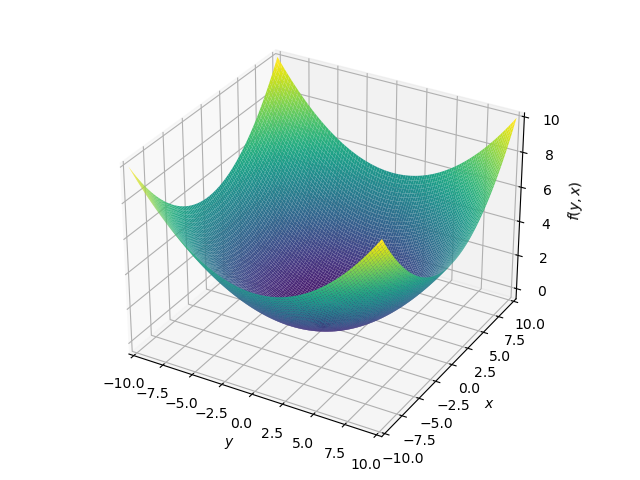

In [13]:
from sympy import *
x,y=symbols('x y')
plotting.plot3d(x*exp(-x**2-y**2)+(x**2+y**2)/20)

In [15]:
# 비선형함수 최소값 구하는 함수 이용 
from scipy.optimize import minimize 

f1=lambdify([x,y],x*exp(-x**2-y**2)+(x**2+y**2)/20)
def f(x):
    return f1(x[0],x[1])
res=minimize(f,x0=[0,0])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.4052368702666853
        x: [-6.691e-01 -9.431e-09]
      nit: 5
      jac: [-1.229e-07 -3.725e-09]
 hess_inv: [[ 5.251e-01  4.567e-07]
            [ 4.567e-07  1.000e+00]]
     nfev: 18
     njev: 6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


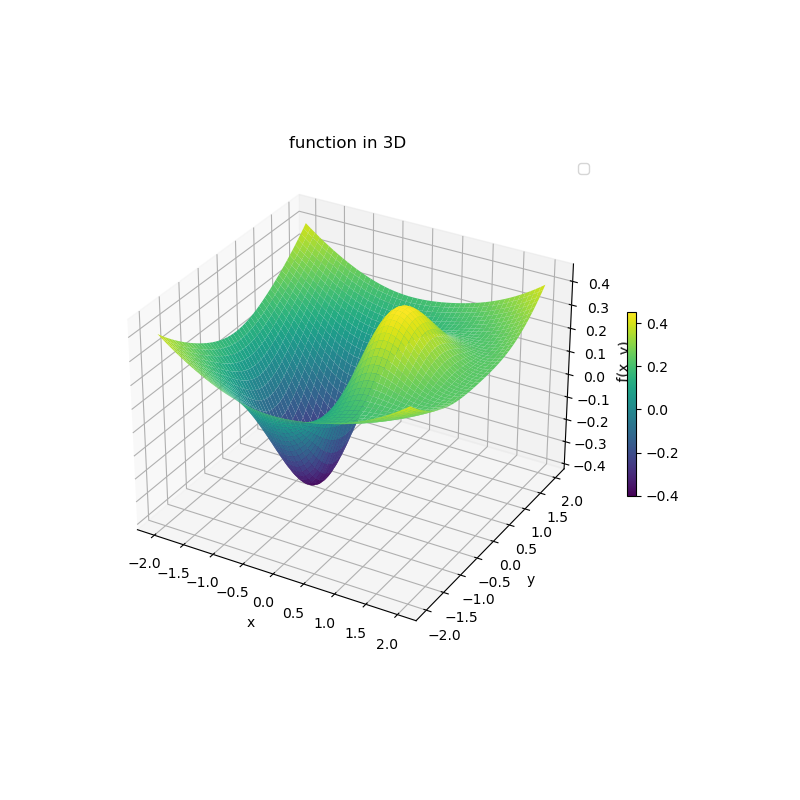

In [20]:
# 그래프 상의 점의 움직임 표현을 위해 numpy, matplotlib 라이브러리 사용
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 함수 재정의
def fn(x, y):
    return x*np.exp(-x**2-y**2)+(x**2+y**2)/20

# 3차원 그래프 생성
fig = plt.figure(figsize=(8, 8)) # 특정 크기의 그림판 생성
ax = fig.add_subplot(111, projection='3d') # 3차원 그래프 설정

# Rosenbrock 함수의 등고선 플로팅
x = np.linspace(-2, 2, 400) # -2,2까지의 점을 400개로 분해해 줌
y = np.linspace(-2, 2, 400) # -2,2까지의 점을 400개로 분해해 줌
X, Y = np.meshgrid(x, y) # (x,y) 좌표 순서쌍 생성
Z = fn(X, Y) # 함수값을 출력해서 Z에 저장
# cmap은 colormap을 지정해줌,Z 값에 따른 색깔 변화
# cmap의 값은  'viridis', 'plasma', 'inferno', 'magma' 등이 있음
surf=ax.plot_surface(X, Y, Z,cmap='viridis')

# colorbar 추가 (색과 숫자간의 관계 설명)
# shrink는 0과 1사이의 값으로 표시되는 bar의 크기
# aspect는 세로와 가로의 비율로 값이 클수록 가로방향으로 작아진다.
fig.colorbar(surf, ax=ax, shrink=0.3, aspect=20)

# 그래프 설정
ax.set_xlabel('x') # x축 라벨
ax.set_ylabel('y') # y축 라벨
ax.set_zlabel('f(x, y)') # z축 라벨
ax.set_title('function in 3D') # 그림 제목
ax.legend() # 보여주기

In [21]:
from sympy import symbols,diff,exp
x,y=symbols('x y')
f=x*exp(-x**2-y**2)+(x**2+y**2)/20
gradient_x=diff(f,x)
gradient_y=diff(f,y)
gradient_x

-2*x**2*exp(-x**2 - y**2) + x/10 + exp(-x**2 - y**2)

In [22]:
gradient_y

-2*x*y*exp(-x**2 - y**2) + y/10

In [23]:
# 경사 상승법 이해하기
import numpy as np
starting_point=(-1.3,0.8) # 초기 (x,y)값 지정

# 해당 점에서 gradient 계산하기 
x,y=starting_point[0],starting_point[1] # (x,y)값에 초기값 대입
gradient_x = -2*x**2*np.exp(-x**2-y**2)+x/10+np.exp(-x**2-y**2)
gradient_y =-2*x*y*np.exp(-x**2-y**2)+y/10
Gf=(gradient_x,gradient_y)
print(f'그래디언트 벡터: {Gf}')

# 원래 점에서 그래디언트 벡터 만큼 더해서 새로운 점 만들기
# alpha는 그래디언트의 반영 정도를 나타내면 학습율로 정의
alpha=1.2
x=x+alpha*gradient_x # x값 업데이트
y=y+alpha*gradient_y # x값 업데이트
next_point=(x,y)
print(f'이동된 점의 위치: {next_point}')

그래디언트 벡터: (-0.361563878073088, 0.28237515394622814)
이동된 점의 위치: (-1.7338766536877057, 1.1388501847354737)


In [24]:
# 함수값 출력하기

print('처음 위치의 함수값:',fn(starting_point[0],starting_point[1]))
print('처음 위치의 함수값:',fn(next_point[0],next_point[1]))

처음 위치의 함수값: -0.00998447121639258
처음 위치의 함수값: 0.1917168879401624


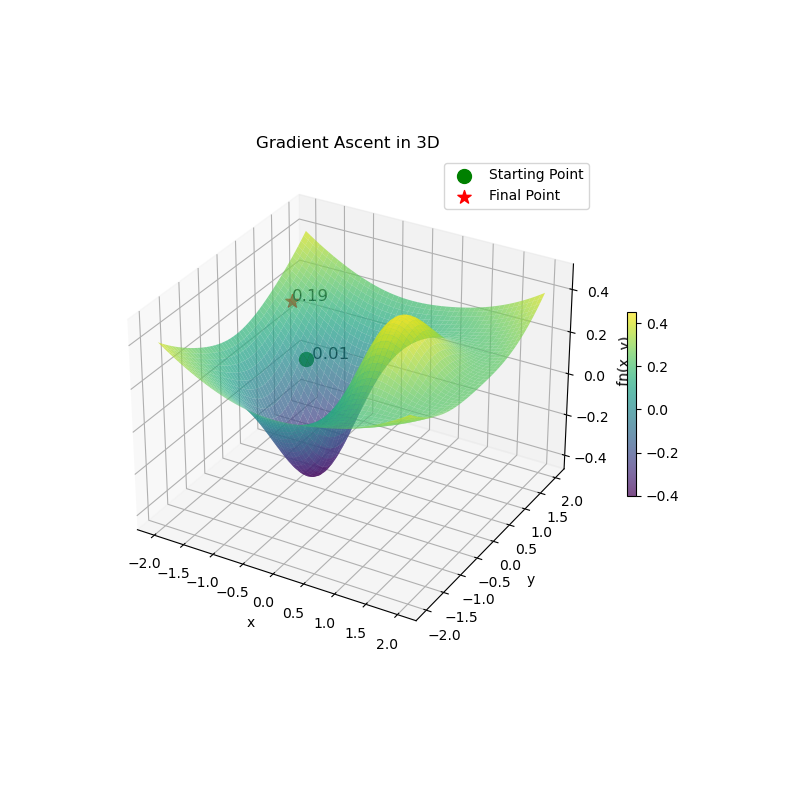

In [25]:
# 경사상승법에 의해 이동한 점 표시하기

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3차원 그래프 생성
fig = plt.figure(figsize=(8, 8)) # 특정 크기의 그림판 생성
ax = fig.add_subplot(111, projection='3d') # 3차원 그래프 설정

# 함수의 등고선 플로팅
x = np.linspace(-2, 2, 400) # -2,2까지의 점을 400개로 분해해 줌
y = np.linspace(-2, 2, 400) # -1,3까지의 점을 400개로 분해해 줌
X, Y = np.meshgrid(x, y) # (x,y) 좌표 순서쌍 생성
Z = fn(X, Y) # 함수값을 출력해서 Z에 저장
# alpha를 사용하여 반투명으로 표현
surf=ax.plot_surface(X, Y, Z,cmap='viridis',alpha=0.7) 
fig.colorbar(surf, ax=ax, shrink=0.3, aspect=20) # 컬러바 표현

# 출발점과 최종 도달 지점 표시
ax.scatter(starting_point[0], starting_point[1], fn(starting_point[0],starting_point[1]), 
           color='g', s=100, marker='o', label='Starting Point')
ax.scatter(next_point[0], next_point[1], fn(next_point[0], next_point[1]), 
           color='r', s=100, marker='*', label='Final Point')

# 각 점에 대한 Z 값 텍스트 추가
xi,yi,zi=starting_point[0], starting_point[1], fn(*starting_point)
ax.text(xi,yi,zi, f'{zi:.2f}', fontsize=12, color='black')
xi,yi,zi=next_point[0], next_point[1], fn(next_point[0], next_point[1])
ax.text(xi,yi,zi, f'{zi:.2f}', fontsize=12, color='black')

# 그래프 설정
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('fn(x, y)')
ax.set_title('Gradient Ascent in 3D')
ax.legend()

# 그래프 표시
plt.show()

In [26]:
# 경사 하강법 이해하기
import numpy as np
starting_point=(-1.5,2.0) # 초기 (x,y)값 지정

# 해당 점에서 gradient 계산하기 
x,y=starting_point[0],starting_point[1] # (x,y)값에 초기값 대입
gradient_x = -2*x**2*np.exp(-x**2-y**2)+x/10+np.exp(-x**2-y**2)
gradient_y =-2*x*y*np.exp(-x**2-y**2)+y/10
Gf=(gradient_x,gradient_y)
print(f'그래디언트 벡터: {Gf}')

# 원래 점에서 그래디언트 벡터 만큼 더해서 새로운 점 만들기
# alpha는 그래디언트의 반영 정도를 나타내면 학습율로 정의
alpha=6
x=x-alpha*gradient_x # x값 업데이트
y=y-alpha*gradient_y # x값 업데이트
next_point=(x,y)
print(f'이동된 점의 위치: {next_point}')

그래디언트 벡터: (-0.15675658947679696, 0.21158272481736626)
이동된 점의 위치: (-0.5594604631392182, 0.7305036510958025)


In [27]:
# 함수값 출력하기

print('처음 위치의 함수값:',fn(starting_point[0],starting_point[1]))
print('처음 위치의 함수값:',fn(next_point[0],next_point[1]))

처음 위치의 함수값: 0.3096043187956584
처음 위치의 함수값: -0.19759699329544492


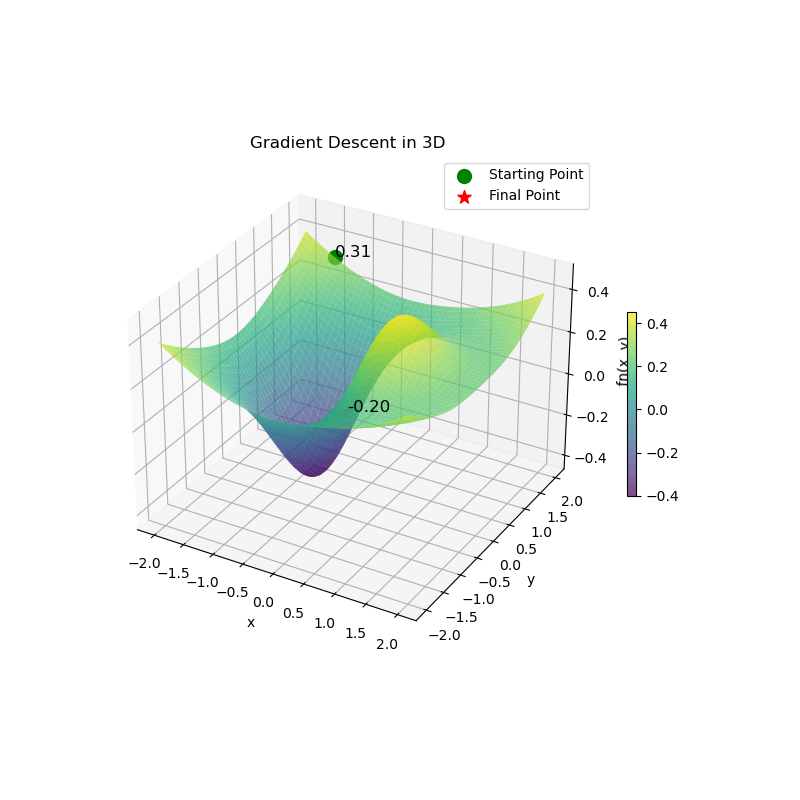

In [28]:
# 경사하강법에 의해 이동한 점 표시하기

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3차원 그래프 생성
fig = plt.figure(figsize=(8, 8)) # 특정 크기의 그림판 생성
ax = fig.add_subplot(111, projection='3d') # 3차원 그래프 설정

# 함수의 등고선 플로팅
x = np.linspace(-2, 2, 400) # -2,2까지의 점을 400개로 분해해 줌
y = np.linspace(-2, 2, 400) # -1,3까지의 점을 400개로 분해해 줌
X, Y = np.meshgrid(x, y) # (x,y) 좌표 순서쌍 생성
Z = fn(X, Y) # 함수값을 출력해서 Z에 저장
# alpha를 사용하여 반투명으로 표현
surf=ax.plot_surface(X, Y, Z,cmap='viridis',alpha=0.7) 
fig.colorbar(surf, ax=ax, shrink=0.3, aspect=20) # 컬러바 표현

# 출발점과 최종 도달 지점 표시
ax.scatter(starting_point[0], starting_point[1], fn(starting_point[0],starting_point[1]), 
           color='g', s=100, marker='o', label='Starting Point')
ax.scatter(next_point[0], next_point[1], fn(next_point[0], next_point[1]), 
           color='r', s=100, marker='*', label='Final Point')

# 각 점에 대한 Z 값 텍스트 추가
xi,yi,zi=starting_point[0], starting_point[1], fn(*starting_point)
ax.text(xi,yi,zi, f'{zi:.2f}', fontsize=12, color='black')
xi,yi,zi=next_point[0], next_point[1], fn(next_point[0], next_point[1])
ax.text(xi,yi,zi, f'{zi:.2f}', fontsize=12, color='black',zorder=10)

# 그래프 설정
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('fn(x, y)')
ax.set_title('Gradient Descent in 3D')
ax.legend()

# 그래프 표시
plt.show()

In [29]:
# 함수 정의
def f(x, y):
    return x*np.exp(-x**2-y**2) + (x**2+y**2)/20

# 경사 하강법 함수 정의
# learning_rate는 그래디언트의 크기의 일부를 반영하는 역할
# num_iterations은 초기값에서 몇 개의 점을 만들지 정하는 역할
def gradient_descent(starting_point, learning_rate, num_iterations):
    points = [starting_point] # 초기값
    x, y = starting_point 

    for _ in range(num_iterations): #
        gradient_x = -2*x**2*np.exp(-x**2-y**2)+x/10+np.exp(-x**2-y**2)
        gradient_y =-2*x*y*np.exp(-x**2-y**2)+y/10

        x = x - learning_rate * gradient_x # 좌표 업데이트
        y = y - learning_rate * gradient_y # 좌표 업데이트

        points.append((x, y)) # 점을 리스트에 주가

    return np.array(points) # 초기값부터 갱신된 값 전체 리턴

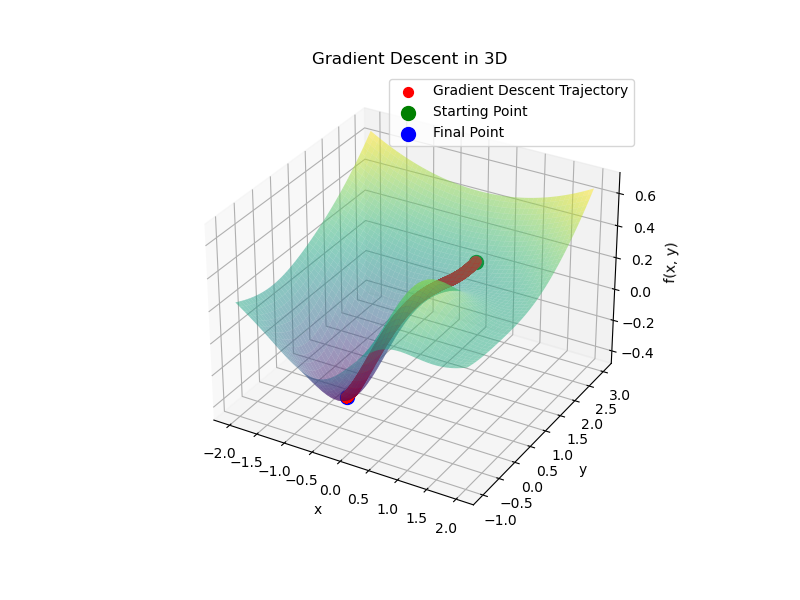

In [30]:
# 경사하강법 반복 수행해 보기
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프 그리는 다른 라이브러리

# 초기 위치 설정
starting_point = (0.5, 2.0)

# 학습률 및 반복 횟수 설정
learning_rate = 0.01  # 학습률을 더 작게 조정
num_iterations = 10000 # 점 생성 갯수 설정

# 경사 하강법 수행
trajectory = gradient_descent(starting_point, learning_rate, num_iterations)

# 3차원 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 함수의 등고선 플로팅
x = np.linspace(-2, 2, 400) # -2에서 2를 400개로 분할
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y) # 순서쌍 생성
Z = f(X, Y) # 원래 함수 값을 Z에 저장
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# 경사 하강법의 점들을 plotting
ax.scatter(trajectory[:, 0], trajectory[:, 1], f(trajectory[:, 0], trajectory[:, 1]), 
           color='r', s=50, label='Gradient Descent Trajectory')

# 출발점과 최종 도달 지점 표시
ax.scatter(starting_point[0], starting_point[1], f(*starting_point), 
           color='g', s=100, marker='o', label='Starting Point')
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], f(trajectory[-1, 0], trajectory[-1, 1]), 
           color='b', s=100, marker='o', label='Final Point')

# 그래프 설정
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent in 3D')
ax.legend()

# 그래프 표시
plt.show()